<a href="https://colab.research.google.com/github/danielicapui/machine_learning/blob/main/book2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup inicial (2 minutos)


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as pw
from numpy import dot
from numpy.linalg import norm
from scipy import sparse
from pandas.api.types import CategoricalDtype
import os
#%matplotlib inline
#pd.set_option("display.max_rows", 5)
#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)

In [ ]:
#Data_set_original
book= pd.read_csv('/content/drive/MyDrive/csv/instrumentos.json',header=None)


In [ ]:
#Assimile a variavel book_data a um dataset para facilitar as trocas
#book_data=livros_data

In [ ]:
#Livros com mais avaliados e em torno caso pudesse rodar tem 20 usuarios distintos
livros_data= pd.read_csv('/content/drive/MyDrive/csv/livros_data.csv')

In [ ]:
#1000 users livros o que estava usando,
book_data= pd.read_csv('/content/drive/MyDrive/csv/book_data.csv')

In [ ]:
#Colunas
book.columns=["item","usuario","rating","timestamp"]

#Requisito(3minutos) não é requisitado causo esolha um destes data_Set

In [ ]:
#Quantidade de avaliações por usuarios.
vinte_users=book.usuario.value_counts().sort_values(ascending=False)
vinte_users

In [ ]:
#Pegando os 100000 com mais avaliações, o mínimo de avalialiações é 186 desses 100000 e o máximo é 9684.
#Valor muito grande diminuindo para 3000, 
#usando  1000
#diminuindo para 100 #teste
#testando com 20 users
shika=vinte_users.index[0:1000]
shika

In [ ]:
livros=book.loc[book.usuario.isin(shika)]
livros

In [ ]:
book_sorteados=np.random.choice(livros_data.index,size=(30000),replace=False)
book_sorteados

array([57131, 39291, 21242, ..., 92292, 81331, 81615])

In [ ]:
#Testando com outro data set
livros_10000=livros_data.loc[livros_data.index.isin(book_sorteados)]
livros_10000

,item,usuario,rating,timestamp
0,0001712799,A1K1JW1C5CUSUZ,5.0,982972800
2,0002005263,A1K1JW1C5CUSUZ,4.0,1053216000
4,0001384198,AHD101501WCN1,5.0,1102291200
9,0001720279,A1K1JW1C5CUSUZ,5.0,984009600
10,0001720392,A1X8VZWTOG8IS6,4.0,1188691200
...,...,...,...,...
92465,B01FIYFP98,A2OJW07GQRNJUT,5.0,1503446400
92467,B01FIYSP18,A3MV1KKHX51FYT,4.0,1490140800
92473,B01FKUTST8,A2OJW07GQRNJUT,5.0,1504483200
92474,B01FOD6N2Q,A3MV1KKHX51FYT,5.0,1489363200


In [ ]:
#criando o dataset
livros_10000.to_csv("/content/drive/MyDrive/csv/livros_data.csv",columns=["item","usuario","rating","timestamp"],index=False)
print("sucesso")

sucesso


In [ ]:
book.loc[book.usuario=="A000033826RVJH496D4A"]

,item,usuario,rating,timestamp
18623833,0895555379,A000033826RVJH496D4A,1.0,1457481600
28021426,1502915707,A000033826RVJH496D4A,1.0,1457481600
32570475,1612785565,A000033826RVJH496D4A,5.0,1457481600


# Não requisitado


In [ ]:
#Avaliação média por usuário
avaliacao_media_usuario = book.rating.mean()
avaliacao_media_usuario

4.393247389319468

In [ ]:
#Usuario que mais avaliou
book_usuario = book.groupby('usuario')
usuario_que_mais_avaliou = book_usuario.item.count().idxmax()
usuario_que_mais_avaliou

'A2OJW07GQRNJUT'

In [ ]:
#Quantidade máxima de avaliações
quanto_avaliou = book_usuario.item.count().max()
quanto_avaliou

9684

In [ ]:
#Avaliações feita pelo usuario
book.loc[book.usuario=="A2OJW07GQRNJUT"]

,item,usuario,rating,timestamp
6423,0002152525,A2OJW07GQRNJUT,5.0,1280188800
52690,0002160552,A2OJW07GQRNJUT,5.0,1357603200
52691,0002160552,A2OJW07GQRNJUT,5.0,1357603200
100578,0006211712,A2OJW07GQRNJUT,5.0,1357776000
100589,0006211712,A2OJW07GQRNJUT,5.0,1357776000
...,...,...,...,...
51298702,B01FJ0W2I8,A2OJW07GQRNJUT,5.0,1343260800
51299284,B01FKTCBY8,A2OJW07GQRNJUT,5.0,1503360000
51299407,B01FKTOQKK,A2OJW07GQRNJUT,5.0,1485043200
51299536,B01FKUTST8,A2OJW07GQRNJUT,5.0,1504483200


#Visualização de dados




In [ ]:

#livros.head()
book_data.head()

,item,usuario,rating,timestamp
0,0002005263,A359U0JFFZ0Q04,4.0,1052784000
1,0001384198,A2G5IFYYHFIQNB,5.0,1394496000
2,0001712764,AQ6AGWKWMTY8H,4.0,1230508800
3,0001950061,A37BRR2L8PX3R2,4.0,1465948800
4,0001950061,AQ6AGWKWMTY8H,4.0,1251158400


In [ ]:
book_data.shape

(20000, 4)

In [ ]:
#Resultado das avaliações
book_data.rating.describe()

count    20000.000000
mean         4.285050
std          0.871513
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

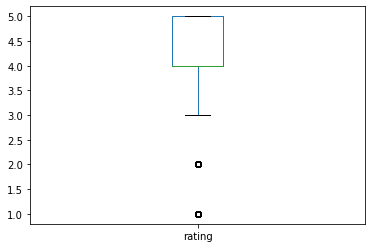

In [ ]:
#Gráfico 1
book_data.rating.plot(kind='box')

In [ ]:
#Items
livros_data.item.apply(str).describe()

count          92495
unique         79104
top       0553212737
freq              92
Name: item, dtype: object

B001C4VLZQ    7
B003156C4E    6
0007350783    6
0142001740    5
B000K5THYU    5
             ..
1539695433    1
0989369420    1
1601424981    1
0060574909    1
0385336624    1
Name: item, Length: 18850, dtype: int64

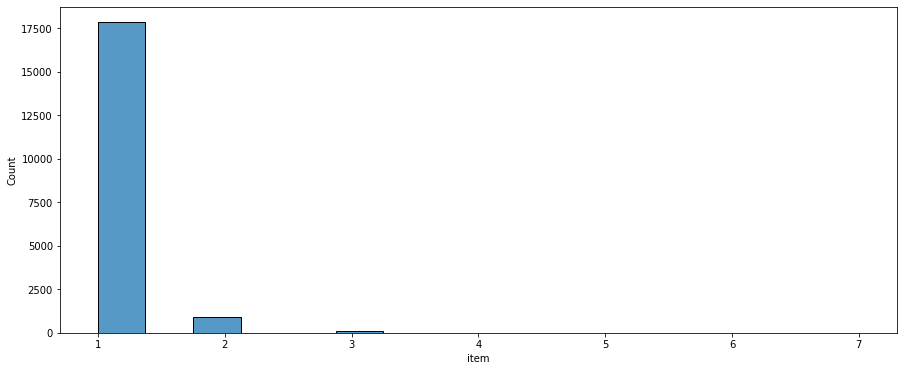

In [ ]:
#Histograma dos reviews dos books.
plt.figure(figsize=(15, 6))
sns.histplot(book_data.item.value_counts());
book_data.item.value_counts()

In [ ]:
#Histograma dos rating.
plt.figure(figsize=(15, 6))
sns.histplot(book_data.item.value_counts());
book.item.value_counts()

# Criando as matrizes.

In [ ]:
#Criando a matriz de utilidade através de uma tabela pivô.
#index --> linhas, columns --> colunas, values --> valores das células
matriz_utilidade_usuario_item = pd.pivot_table(book_data, index='usuario', columns='item', values='rating')
matriz_utilidade_usuario_item

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A108M62RB1HTC0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1098Z3D7ENJ2F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10DX94ATZQEFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10SXQMQBJ2L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZK12FBX7X7LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZPXI8VOPVK2E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#Substituindo o NaN por zero
matriz_utilidade_usuario_item_com_zeros = matriz_utilidade_usuario_item.fillna(0)
matriz_similaridade_coseno = pd.DataFrame(pw.cosine_similarity(matriz_utilidade_usuario_item_com_zeros),
                                          index=matriz_utilidade_usuario_item_com_zeros.index,
                                          columns=matriz_utilidade_usuario_item_com_zeros.index)
matriz_similaridade_coseno

usuario,A103M7E0BSFC83,A108M62RB1HTC0,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10SXQMQBJ2L,A10XN3J1JEXLTJ,A11B61QBGHLQDN,A11DCTGTPS7M0C,A11L3YX5WIDKJ,A11M21SEZANTV2,A11OTLEDSW8ZXD,A11XAIFA10G7TS,A126KX6FVI4T66,A126YLPKFPNQDS,A12A08OL0TZY0W,A12K5Y2SEANYW0,A12LKEM543ILBK,A12RUNSGFAZFE7,A133ZC2Z8MAIED,A134C9GVEU5TQE,A135NSTCX38DEI,A136YD08SCJ2LV,A137UEIU93IFEF,A13A0VU2GP7BZH,A13F2IV3ME23R,A13G1TKIKHGV3F,A13LERNQ8R7267,A13OFOB1394G31,A13Q1R1HIBPG6D,A13QTZ8CIMHHG4,A140XH16IKR4B0,A141H51I3H4B1S,A142HAT43L5W4W,A143IV9N6HPKKB,A14BGBOZ94S3JW,A14I311IIUMBWC,A15EI56DL57DZC,A15P6JXOSIN2TG,A15PF9JMCVTSA9,A15Q5MVRVBMKW7,...,AUGABW5AS2OXM,AUHG8KSHI529U,AUM3YMZ0YRJE0,AUTBHG6070SL4,AUZ3EJAU37NC5,AUZ96COITGKE3,AV6ORIR1JV86P,AVC8ZAFPYOHZL,AVO3NDENWYHEH,AW3VZ5O895LRK,AW4NFCPN81CS3,AW7JJRAMYZY1X,AW97LPKXQUJIF,AWEJ5JKD3MQMU,AWFMGDUUGNGYW,AX0ZTNX6KVJ40,AX2OKB7GR55FZ,AX48LWJBU5RUH,AX54G5AL870Q8,AX5KL9LWC1TG6,AX7QPL1UI24F7,AX9C10JD538D9,AXIO51VZN815F,AXMKAXC0TR9AW,AXMNLUJHA9RG7,AXR1SRGSEECG5,AXSH6O4OP5L4M,AY17DZYGNYJ0L,AY9CVOJGDAKL6,AYNTULRNAIPNY,AYT4FJYVCHYLE,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AYYAIPS6M3HB8,AZFENNBSMN980,AZGDIB6UL3QNL,AZK12FBX7X7LN,AZPXI8VOPVK2E,AZTFBJTENKT1T,AZULU4TOTOLEU
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108M62RB1HTC0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1098Z3D7ENJ2F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10DX94ATZQEFG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10SXQMQBJ2L,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.058231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AZK12FBX7X7LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#Experimento: Parte do livro.

## O uso de zero altera o resultado das distâncias?



###Adicionando zero nas colunas.

In [ ]:
exemplo_livro = pd.DataFrame( {'1': [7,6,np.NaN,1,1], '2': [6,7,3,2,np.NaN] , '3': [7,np.NaN,3,2,1], '4': [4,4,1,3,2], '5':[5,3,1,3,3] , '6': [4,4,np.NaN,4,3]}, index=[1,2,3,4,5])
exemplo_livro

,1,2,3,4,5,6
1,7.0,6.0,7.0,4,5,4.0
2,6.0,7.0,NaN,4,3,4.0
3,NaN,3.0,3.0,1,1,NaN
4,1.0,2.0,2.0,3,3,4.0
5,1.0,NaN,1.0,2,3,3.0


In [ ]:
exemplo_livro_com_zeros = exemplo_livro.fillna(0)
exemplo_livro_com_zeros

,1,2,3,4,5,6
1,7.0,6.0,7.0,4,5,4.0
2,6.0,7.0,0.0,4,3,4.0
3,0.0,3.0,3.0,1,1,0.0
4,1.0,2.0,2.0,3,3,4.0
5,1.0,0.0,1.0,2,3,3.0


In [ ]:
#Perceba que há diferênca no uso de zeros ou seja é melhor apagar a coluna
usuario3 = exemplo_livro_com_zeros.iloc[2:3]
sim_cos_usuario3_com_zeros = pw.cosine_similarity(usuario3, exemplo_livro_com_zeros )

###Excluíndo as colunas.

In [ ]:
#Excluir colunas nulas e manter cheia #usarse notna==tudo menos vazio
colunas_limpas= exemplo_livro.iloc[2:3].notna()
colunas_limpas

,1,2,3,4,5,6
3,False,True,True,True,True,False


In [ ]:
#exemplo_livro
exemplo_livro_usuario3 = exemplo_livro.loc[:, colunas_limpas.values.T]
exemplo_livro_usuario3

,2,3,4,5
1,6.0,7.0,4,5
2,7.0,NaN,4,3
3,3.0,3.0,1,1
4,2.0,2.0,3,3
5,NaN,1.0,2,3


In [ ]:
sim_cos_usuario3 = []
for usuario in range(0,5):
  colunas_limpas = exemplo_livro_usuario3.iloc[usuario:usuario+1].notna().values.T
  sim_cos_usuario3.append(pw.cosine_similarity(
      exemplo_livro_usuario3.iloc[usuario:usuario+1, colunas_limpas], 
      exemplo_livro_usuario3.iloc[2:3, colunas_limpas]))
sim_cos_usuario3

[array([[0.95618289]]),
 array([[0.98139949]]),
 array([[1.]]),
 array([[0.78935222]]),
 array([[0.64465837]])]

##Analise os resultados

In [ ]:
#Excluindo colunas
sim_cos_usuario3

[array([[0.95618289]]),
 array([[0.98139949]]),
 array([[1.]]),
 array([[0.78935222]]),
 array([[0.64465837]])]

In [ ]:
#Não excluindo colunas
sim_cos_usuario3_com_zeros

array([[0.77662176, 0.55777335, 1.        , 0.61379491, 0.36514837]])

Perceba que a uma diferença muito grande quando excluimos ou substituimos por zero coluna Nan. Logo em buscar de valores mais confiáveis é vítal eliminar colunas do que colocar zero.

#Experimento com Livros

##Usando zeros nos NAN



In [ ]:
#Adicionando zeros aos livros
ex_livros=matriz_utilidade_usuario_item.fillna(0)
ex_livros

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108M62RB1HTC0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1098Z3D7ENJ2F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10DX94ATZQEFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10SXQMQBJ2L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZK12FBX7X7LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZPXI8VOPVK2E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
usuario3=ex_livros.iloc[2:3]
usuario3

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1098Z3D7ENJ2F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sim_cos_usuario3_com_zeros = pw.cosine_similarity(usuario3, ex_livros )
sim_cos_usuario3_com_zeros

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04472136, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

##Excluindo colunas

In [ ]:
#Pegando a matriz dos livros e escolhendo colunas para apagar
colunas_limpas=matriz_utilidade_usuario_item.iloc[2:3].notna()
colunas_limpas

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1098Z3D7ENJ2F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Pegando os valores
user3=matriz_utilidade_usuario_item.loc[:, colunas_limpas.values.T]
user3

item,1484909917,1497472547,1500697451,1501124269,1523635142,1523719273,1541003411,1548389374,1682306267,1940883725,1974435679,1979706719
usuario,,,,,,,,,,,,
A103M7E0BSFC83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A108M62RB1HTC0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1098Z3D7ENJ2F,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
A10DX94ATZQEFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10SXQMQBJ2L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZK12FBX7X7LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZPXI8VOPVK2E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Fazendo a similiridade
sim_cos_user3 = []
for usuario in range(0,5):
  colunas_limpas = user3.iloc[usuario:usuario+1].notna().values.T
  sim_cos_user3.append(pw.cosine_similarity(
      user3.iloc[usuario:usuario+1, colunas_limpas], 
      user3.iloc[2:3, colunas_limpas]))

sim_cos_user3

#Matriz esparças

In [ ]:
# Transformando em variáveis categóricas para mapear cada linha em cada coluna
usuario_c = CategoricalDtype(sorted(book_data.usuario.unique()), ordered=True)
item_c = CategoricalDtype(sorted(book_data.item.unique()), ordered=True)
linha = book_data.usuario.astype(usuario_c).cat.codes
coluna = book_data.item.astype(item_c).cat.codes

In [ ]:
#Convertendo para matriz esparsa. Existem várias implementações diferentes. Uma delas é a que condensa por linha.
matriz_utilidade_esparsa = sparse.csr_matrix((book_data['rating'],(linha, coluna) ), shape = (usuario_c.categories.size, item_c.categories.size))
matriz_utilidade_esparsa.todense()

matrix([[ 0.,  4.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0., 75.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  3.,  5.],
        [ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
#Similaridade por cosseno
pw.cosine_similarity(matriz_utilidade_esparsa)

array([[1.00000000e+00, 1.40371899e-03, 3.61025252e-02, 0.00000000e+00,
        6.60124582e-03, 1.98867793e-03, 8.74815258e-03, 3.12541849e-03,
        1.24338701e-02, 1.53879736e-03, 5.61521380e-03, 1.91757625e-03,
        4.45514711e-03, 1.82388397e-03, 0.00000000e+00, 0.00000000e+00,
        1.38932707e-03, 3.21983394e-03, 4.92816292e-03, 7.80580435e-04],
       [1.40371899e-03, 1.00000000e+00, 7.10994072e-04, 1.09596975e-02,
        1.19011709e-03, 0.00000000e+00, 6.39171288e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.67198003e-03,
        0.00000000e+00, 5.85933255e-03, 0.00000000e+00, 3.51250149e-02,
        4.52240988e-03, 0.00000000e+00, 0.00000000e+00, 4.70808960e-03],
       [3.61025252e-02, 7.10994072e-04, 1.00000000e+00, 0.00000000e+00,
        3.90660010e-02, 1.55350064e-02, 2.41012702e-02, 0.00000000e+00,
        1.32943087e-01, 1.77641998e-02, 0.00000000e+00, 1.97109789e-02,
        0.00000000e+00, 3.89680170e-03, 0.00000000e+00, 6.8500

#Média e rank

## Utilizando os resultados

In [ ]:
matriz_utilidade_usuario_item_com_zeros

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108M62RB1HTC0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1098Z3D7ENJ2F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10DX94ATZQEFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10SXQMQBJ2L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZK12FBX7X7LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZPXI8VOPVK2E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Matriz por coseno
matriz_similaridade_coseno

usuario,A103M7E0BSFC83,A108M62RB1HTC0,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10SXQMQBJ2L,A10XN3J1JEXLTJ,A11B61QBGHLQDN,A11DCTGTPS7M0C,A11L3YX5WIDKJ,A11M21SEZANTV2,A11OTLEDSW8ZXD,A11XAIFA10G7TS,A126KX6FVI4T66,A126YLPKFPNQDS,A12A08OL0TZY0W,A12K5Y2SEANYW0,A12LKEM543ILBK,A12RUNSGFAZFE7,A133ZC2Z8MAIED,A134C9GVEU5TQE,A135NSTCX38DEI,A136YD08SCJ2LV,A137UEIU93IFEF,A13A0VU2GP7BZH,A13F2IV3ME23R,A13G1TKIKHGV3F,A13LERNQ8R7267,A13OFOB1394G31,A13Q1R1HIBPG6D,A13QTZ8CIMHHG4,A140XH16IKR4B0,A141H51I3H4B1S,A142HAT43L5W4W,A143IV9N6HPKKB,A14BGBOZ94S3JW,A14I311IIUMBWC,A15EI56DL57DZC,A15P6JXOSIN2TG,A15PF9JMCVTSA9,A15Q5MVRVBMKW7,...,AUGABW5AS2OXM,AUHG8KSHI529U,AUM3YMZ0YRJE0,AUTBHG6070SL4,AUZ3EJAU37NC5,AUZ96COITGKE3,AV6ORIR1JV86P,AVC8ZAFPYOHZL,AVO3NDENWYHEH,AW3VZ5O895LRK,AW4NFCPN81CS3,AW7JJRAMYZY1X,AW97LPKXQUJIF,AWEJ5JKD3MQMU,AWFMGDUUGNGYW,AX0ZTNX6KVJ40,AX2OKB7GR55FZ,AX48LWJBU5RUH,AX54G5AL870Q8,AX5KL9LWC1TG6,AX7QPL1UI24F7,AX9C10JD538D9,AXIO51VZN815F,AXMKAXC0TR9AW,AXMNLUJHA9RG7,AXR1SRGSEECG5,AXSH6O4OP5L4M,AY17DZYGNYJ0L,AY9CVOJGDAKL6,AYNTULRNAIPNY,AYT4FJYVCHYLE,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AYYAIPS6M3HB8,AZFENNBSMN980,AZGDIB6UL3QNL,AZK12FBX7X7LN,AZPXI8VOPVK2E,AZTFBJTENKT1T,AZULU4TOTOLEU
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108M62RB1HTC0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1098Z3D7ENJ2F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10DX94ATZQEFG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10SXQMQBJ2L,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.058231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AZK12FBX7X7LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#Os 20 usuarios mais similares ao usuario sorteado e sua similaridade
usuarios_similares_5 = matriz_similaridade_coseno[sorteado].sort_values(ascending=False)[1:21]
usuarios_similares_5

usuario
A1HXF0IBWTAP84    0.06695
AZULU4TOTOLEU     0.00000
A292NDEAXUNW62    0.00000
A2B8GXSCB1R05T    0.00000
A2B7PG6P30GPZT    0.00000
A2B1GZIRD6W646    0.00000
A2AYSFGUP5VTY3    0.00000
A2AOG5TS7W6OXY    0.00000
A2ANWGPM3M2JPD    0.00000
A2AIE9DO5QSVBD    0.00000
A2AFIEWV1QKF8E    0.00000
A2A1GRZL896QTF    0.00000
A29NUB3P6YIWZG    0.00000
A29M69HGLQSG8Z    0.00000
A29HCCZYB9DRI9    0.00000
A28WJUJF6D2ULA    0.00000
A2BV8WQVLV2G4L    0.00000
A28P4OU54QVN8T    0.00000
A28GRFK2F3TMWE    0.00000
A28D20IM3BNAJ1    0.00000
Name: A3H1TO48SUIM54, dtype: float64

In [ ]:
#Pegando apenas as avaliações dos usuários são mais similares 
notas_usuarios_similares = matriz_utilidade_usuario_item_com_zeros.loc[ usuarios_similares_5.index ]
notas_usuarios_similares

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1HXF0IBWTAP84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZULU4TOTOLEU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A292NDEAXUNW62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2B8GXSCB1R05T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2B7PG6P30GPZT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2B1GZIRD6W646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2AYSFGUP5VTY3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2AOG5TS7W6OXY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ANWGPM3M2JPD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

##Rank

In [ ]:
#Usamos a função np.average pra calcular a média ponderada *requer matriz esparças e Utilizando resultados
rank_livros = np.average(notas_usuarios_similares, axis=0, weights=usuarios_similares_5)
rank_livros

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#Verificar os livros que o usuário sorteado assistiu e fez review
livros_usuario_sorteado =book_data[book_data.usuario==sorteado] 
livros_usuario_sorteado

,item,usuario,rating,timestamp
3348,0345536061,A3H1TO48SUIM54,5.0,1451692800
7553,0821768670,A3H1TO48SUIM54,5.0,1460937600
8270,0996801081,A3H1TO48SUIM54,5.0,1464825600
8590,1250061075,A3H1TO48SUIM54,5.0,1444089600
10011,1477848622,A3H1TO48SUIM54,4.0,1493164800
10539,1497302420,A3H1TO48SUIM54,4.0,1487721600
11189,1518777082,A3H1TO48SUIM54,4.0,1462147200
12176,1601839189,A3H1TO48SUIM54,5.0,1503964800
12404,1616265949,A3H1TO48SUIM54,4.0,1393200000
13227,1940951054,A3H1TO48SUIM54,4.0,1470009600


## Rank_livros_df

In [ ]:
#Criando um dataframe para manipular o resultado e verificar as 10 sugestões para o usuário sorteado
rank_livros_df = pd.DataFrame({'rank': rank_livros}, index = notas_usuarios_similares.columns )
rank_livros_df


,rank
item,
000100039X,0.0
0001048767,0.0
0001384198,0.0
0001712764,0.0
0001844423,0.0
...,...
B01GP58H5I,0.0
B01GU96G2A,0.0
B01H082DN6,0.0


In [ ]:
#Removendo os que ele já assistiu, #eu já fiz isso nos numeros mas só seguir o roteiro.
usuario_sorteado_assistiu = rank_livros_df.index.isin(livros_usuario_sorteado.item)
rank_livros_df = rank_livros_df.loc[ ~usuario_sorteado_assistiu ].sort_values(by="rank",ascending=False)
rank_livros_df


,rank
item,
1543237819,5.0
1508929890,5.0
1482640058,5.0
0062267884,5.0
1984273566,5.0
...,...
0523004087,0.0
052188747X,0.0
0521882745,0.0


In [ ]:
#Mais parecido
rank_livros_df[1:10]

,rank
item,
1508929890,5.0
1482640058,5.0
0062267884,5.0
1984273566,5.0
1497452864,5.0
1512039896,5.0
1523253363,5.0
0062107763,5.0
1499291019,4.0


In [ ]:
#menos parecido
rank_livros_df.tail(10)

,rank
item,
0525429131,0.0
0525428763,0.0
0521699568,0.0
0525422064,0.0
0525248803,0.0
0523004087,0.0
052188747X,0.0
0521882745,0.0
0521709156,0.0


In [ ]:
#Agora os top 10
top10_usuario_sorteado = rank_livros_df['rank'].sort_values(ascending=False).iloc[0:10].index.to_list()
top10_usuario_sorteado

['1543237819',
 '1508929890',
 '1482640058',
 '0062267884',
 '1984273566',
 '1497452864',
 '1512039896',
 '1523253363',
 '0062107763',
 '1461026415']

##Analisando os resultados

In [ ]:
id_livros_preferidos_usuario_sorteado = livros_usuario_sorteado.sort_values(ascending=False, by='rating').iloc[:10,1]
#livros_preferidos_usuario_sorteado =book_data.loc[ book_data.item.isin(id_livros_preferidos_usuario_sorteado)]
#livros_preferidos_usuario_sorteado
#no caso do data_set tiver title
#livros_prferidos_usuario_sorteado["title"]
id_livros_preferidos_usuario_sorteado

3348     A3H1TO48SUIM54
17196    A3H1TO48SUIM54
8270     A3H1TO48SUIM54
8590     A3H1TO48SUIM54
18032    A3H1TO48SUIM54
17950    A3H1TO48SUIM54
17850    A3H1TO48SUIM54
12176    A3H1TO48SUIM54
7553     A3H1TO48SUIM54
13618    A3H1TO48SUIM54
Name: usuario, dtype: object

In [ ]:
#Os livros por id
livros_escolhidos=livros_usuario_sorteado.loc[livros_usuario_sorteado.index.isin(id_livros_preferidos_usuario_sorteado.index)]
livros_escolhidos.item

3348     0345536061
7553     0821768670
8270     0996801081
8590     1250061075
12176    1601839189
13618    1981896406
17196    0989233030
17850    1493560840
17950    1508724296
18032    1533098298
Name: item, dtype: object

In [ ]:
#Livro odiados
id_livros_odiados_usuario_sorteado =livros_usuario_sorteado.sort_values(ascending=True,by='rating').iloc[:10,1]
#livros_odiados_usuario_sorteado = book_data.loc[book_data.item.isin (id_livros_odiados_usuario_sorteado)]
#livros_odiados_usuario_sorteado['title']
id_livros_odiados_usuario_sorteado

19239    A3H1TO48SUIM54
13227    A3H1TO48SUIM54
17604    A3H1TO48SUIM54
17336    A3H1TO48SUIM54
13446    A3H1TO48SUIM54
12404    A3H1TO48SUIM54
19806    A3H1TO48SUIM54
10539    A3H1TO48SUIM54
10011    A3H1TO48SUIM54
11189    A3H1TO48SUIM54
Name: usuario, dtype: object

#Usuario e produtos aleatório.

## Criando as matrizes.

In [ ]:
#Criando a matriz de utilidade através de uma tabela pivô. item,usuario
#index --> linhas, columns --> colunas, values --> valores das células
matriz_utilidade_item_usuario = pd.pivot_table(book_data, index='item', columns='usuario', values='rating')
matriz_utilidade_item_usuario

usuario,A103M7E0BSFC83,A108M62RB1HTC0,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10SXQMQBJ2L,A10XN3J1JEXLTJ,A11B61QBGHLQDN,A11DCTGTPS7M0C,A11L3YX5WIDKJ,A11M21SEZANTV2,A11OTLEDSW8ZXD,A11XAIFA10G7TS,A126KX6FVI4T66,A126YLPKFPNQDS,A12A08OL0TZY0W,A12K5Y2SEANYW0,A12LKEM543ILBK,A12RUNSGFAZFE7,A133ZC2Z8MAIED,A134C9GVEU5TQE,A135NSTCX38DEI,A136YD08SCJ2LV,A137UEIU93IFEF,A13A0VU2GP7BZH,A13F2IV3ME23R,A13G1TKIKHGV3F,A13LERNQ8R7267,A13OFOB1394G31,A13Q1R1HIBPG6D,A13QTZ8CIMHHG4,A140XH16IKR4B0,A141H51I3H4B1S,A142HAT43L5W4W,A143IV9N6HPKKB,A14BGBOZ94S3JW,A14I311IIUMBWC,A15EI56DL57DZC,A15P6JXOSIN2TG,A15PF9JMCVTSA9,A15Q5MVRVBMKW7,...,AUGABW5AS2OXM,AUHG8KSHI529U,AUM3YMZ0YRJE0,AUTBHG6070SL4,AUZ3EJAU37NC5,AUZ96COITGKE3,AV6ORIR1JV86P,AVC8ZAFPYOHZL,AVO3NDENWYHEH,AW3VZ5O895LRK,AW4NFCPN81CS3,AW7JJRAMYZY1X,AW97LPKXQUJIF,AWEJ5JKD3MQMU,AWFMGDUUGNGYW,AX0ZTNX6KVJ40,AX2OKB7GR55FZ,AX48LWJBU5RUH,AX54G5AL870Q8,AX5KL9LWC1TG6,AX7QPL1UI24F7,AX9C10JD538D9,AXIO51VZN815F,AXMKAXC0TR9AW,AXMNLUJHA9RG7,AXR1SRGSEECG5,AXSH6O4OP5L4M,AY17DZYGNYJ0L,AY9CVOJGDAKL6,AYNTULRNAIPNY,AYT4FJYVCHYLE,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AYYAIPS6M3HB8,AZFENNBSMN980,AZGDIB6UL3QNL,AZK12FBX7X7LN,AZPXI8VOPVK2E,AZTFBJTENKT1T,AZULU4TOTOLEU
item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000100039X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001048767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001384198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001712764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001844423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B01GP58H5I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01GU96G2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01H082DN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#Substituindo o NaN por zero
matriz_utilidade_item_usuario_com_zeros = matriz_utilidade_item_usuario.fillna(0)
matriz_similaridade_coseno_item = pd.DataFrame(pw.cosine_similarity(matriz_utilidade_item_usuario_com_zeros),
                                          index=matriz_utilidade_item_usuario_com_zeros.index,
                                          columns=matriz_utilidade_item_usuario_com_zeros.index)
matriz_similaridade_coseno_item

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000100039X,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001048767,0.0,1.0,0.0,0.0,0.0,0.545545,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001384198,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001712764,0.0,0.0,0.0,1.0,0.0,0.000000,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001844423,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B01GP58H5I,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
B01GU96G2A,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
B01H082DN6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
#produto aleatorio
produto_aleatorio=np.random.choice(book_data.item)
produto_aleatorio

'1416563628'

In [ ]:
#Quem são os produtos 10  mais similares ao produto_aleatorio e sua similaridade
produto_similares_aleatorio = matriz_similaridade_coseno_item[produto_aleatorio].sort_values(ascending=False)
produto_similares_aleatorio[1:11]

item
1885941145    1.0
0060559128    1.0
0099492393    1.0
071954243X    1.0
0446401161    1.0
0399157433    1.0
067102406X    1.0
0446604631    1.0
0143113925    1.0
1416563628    1.0
Name: 1416563628, dtype: float64

In [ ]:
#menos similares
produto_similares_aleatorio.tail(10)

item
1469226340    0.0
1469228009    0.0
1469905833    0.0
1469237164    0.0
1469241641    0.0
1469242222    0.0
1469250675    0.0
1469289881    0.0
1469290103    0.0
000100039X    0.0
Name: 1416563628, dtype: float64

In [ ]:
#com os mais parecidos
produto_similares_aleatorio=produto_similares_aleatorio[1:11]

In [ ]:
#Pegamos apenas as avaliações dos usuários que julgamos similares 
notas_produtos_similares = matriz_utilidade_item_usuario_com_zeros.loc[ produto_similares_aleatorio.index ]
notas_produtos_similares

usuario,A103M7E0BSFC83,A108M62RB1HTC0,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10SXQMQBJ2L,A10XN3J1JEXLTJ,A11B61QBGHLQDN,A11DCTGTPS7M0C,A11L3YX5WIDKJ,A11M21SEZANTV2,A11OTLEDSW8ZXD,A11XAIFA10G7TS,A126KX6FVI4T66,A126YLPKFPNQDS,A12A08OL0TZY0W,A12K5Y2SEANYW0,A12LKEM543ILBK,A12RUNSGFAZFE7,A133ZC2Z8MAIED,A134C9GVEU5TQE,A135NSTCX38DEI,A136YD08SCJ2LV,A137UEIU93IFEF,A13A0VU2GP7BZH,A13F2IV3ME23R,A13G1TKIKHGV3F,A13LERNQ8R7267,A13OFOB1394G31,A13Q1R1HIBPG6D,A13QTZ8CIMHHG4,A140XH16IKR4B0,A141H51I3H4B1S,A142HAT43L5W4W,A143IV9N6HPKKB,A14BGBOZ94S3JW,A14I311IIUMBWC,A15EI56DL57DZC,A15P6JXOSIN2TG,A15PF9JMCVTSA9,A15Q5MVRVBMKW7,...,AUGABW5AS2OXM,AUHG8KSHI529U,AUM3YMZ0YRJE0,AUTBHG6070SL4,AUZ3EJAU37NC5,AUZ96COITGKE3,AV6ORIR1JV86P,AVC8ZAFPYOHZL,AVO3NDENWYHEH,AW3VZ5O895LRK,AW4NFCPN81CS3,AW7JJRAMYZY1X,AW97LPKXQUJIF,AWEJ5JKD3MQMU,AWFMGDUUGNGYW,AX0ZTNX6KVJ40,AX2OKB7GR55FZ,AX48LWJBU5RUH,AX54G5AL870Q8,AX5KL9LWC1TG6,AX7QPL1UI24F7,AX9C10JD538D9,AXIO51VZN815F,AXMKAXC0TR9AW,AXMNLUJHA9RG7,AXR1SRGSEECG5,AXSH6O4OP5L4M,AY17DZYGNYJ0L,AY9CVOJGDAKL6,AYNTULRNAIPNY,AYT4FJYVCHYLE,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AYYAIPS6M3HB8,AZFENNBSMN980,AZGDIB6UL3QNL,AZK12FBX7X7LN,AZPXI8VOPVK2E,AZTFBJTENKT1T,AZULU4TOTOLEU
item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1885941145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060559128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0099492393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
071954243X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0446401161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0399157433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
067102406X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0446604631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0143113925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Usamos a função np.average pra calcular a média ponderada
rank_produtos = np.average(notas_produtos_similares, axis=0, weights=produto_similares_aleatorio)
rank_produtos

##Sorteando

In [ ]:
#Escolhendo um usuario da lista livros_data
sorteado=np.random.choice(book_data.usuario)
sorteado

'A3H1TO48SUIM54'

In [ ]:
#Vendo produtos que o usuario não avaliou
produtos_nao_avaliados=book_data.loc[book_data.usuario!=sorteado]
produtos_nao_avaliados

,item,usuario,rating,timestamp
0,0002005263,A359U0JFFZ0Q04,4.0,1052784000
1,0001384198,A2G5IFYYHFIQNB,5.0,1394496000
2,0001712764,AQ6AGWKWMTY8H,4.0,1230508800
3,0001950061,A37BRR2L8PX3R2,4.0,1465948800
4,0001950061,AQ6AGWKWMTY8H,4.0,1251158400
...,...,...,...,...
19995,B01F82H6E2,A2XH6KI5ZLRLPS,4.0,1503446400
19996,B01FGPD77G,A2MR87VMPFNFJ5,3.0,1527724800
19997,B01FMW0IIY,ATK1PI2HWROER,4.0,1518048000
19998,B01GP58H5I,A2W4Z0J9DFZFSR,5.0,1485648000


In [ ]:
#Pegando o index aleatorio e não é repetido de 1000 items que não avaliou
produtos_1000=np.random.choice(produtos_nao_avaliados.index,size=(1000),replace=False)
produtos_1000

array([ 3794,   425, 11865, 19300,  7595,  2918,  2162, 16199, 19846,
       10197, 10961,   133,    49, 17947, 12339, 12070, 19489, 12377,
        9346, 16009,  1932,  2660, 10768, 15949,  2465,  2967,  2327,
       16428, 18992,  1573,  6767, 15946, 15808, 10898,   763, 11787,
        3696, 14133, 11281, 14732, 17888, 16810, 15839,  1922, 15760,
       19307, 18283,  2713,  7744, 17396, 13984,  8142, 13620,  7144,
       13494,  9853,  7560,  4244,  6274, 16319,  7971,  9081, 14016,
       11083, 11993, 12235, 15388, 10689,  6690,  3649, 18469, 18304,
        8692,  2582, 13467,   723,  3663,   176, 11957,  5915,  6585,
        1996,  2294,  3293,  3281,  4626,  8411,  6464,  9260,  7046,
       14936,  2222,  7550, 16206,  7873, 13840,  2350, 12788, 15819,
        1652,  3300,  2751, 10960, 15141,  6150, 19384,   609,  2409,
       10249, 14798, 13202,  4730, 18661, 16382,  2853, 11262, 12239,
       14568,  4261, 13036, 16767,     3, 17699,  8139, 16694, 18971,
        3198,  3342,

In [ ]:
#Pegando no data_set os 1000 produtos escolhidos
livros_item_1000=book_data.loc[book_data.index.isin(produtos_1000)]
livros_item_1000

,item,usuario,rating,timestamp
3,0001950061,A37BRR2L8PX3R2,4.0,1465948800
33,0003302245,A2KWQ64TRHB3YH,5.0,1508803200
36,0006140823,A2VPX1QH62VSMH,4.0,1448323200
49,0006755488,A27XUU2DXILHYZ,4.0,1372636800
50,0006175015,A2MF4TISBBQT5A,4.0,1340928000
...,...,...,...,...
19836,1886199167,A21NVBFIEQWDSG,4.0,1150156800
19846,0997111860,A3GWE80SUGORJD,4.0,1531353600
19889,B00J71SOL0,AGB7UQZMVHNUJ,4.0,1416787200
19957,B014CEGS46,A2LLWCQVYKYF0F,3.0,1473292800


##Rank dos produtos

##Teste com avaliados e não avaliados

In [ ]:
#Use esta  celula para escolher manualmente um sorteado,caso não queira aleatorio
#sorteado="AHUT55E980RDR"

In [ ]:
#Vou testar fazer a similiridade por itens não avaliados  e avaliados do usuario.
#Avaliados
item_avaliados=book_data.loc[book_data.usuario==sorteado]
item_avaliados

,item,usuario,rating,timestamp
11169,151741380X,A39CVMK2ZKEIK2,5.0,1492646400
11496,1537799118,A39CVMK2ZKEIK2,5.0,1496188800
11706,1547015632,A39CVMK2ZKEIK2,5.0,1497052800
11708,1546914234,A39CVMK2ZKEIK2,5.0,1498089600
11731,1548399922,A39CVMK2ZKEIK2,5.0,1499904000
13231,1940941768,A39CVMK2ZKEIK2,5.0,1496534400
13521,1975979753,A39CVMK2ZKEIK2,5.0,1504915200
13546,197750972X,A39CVMK2ZKEIK2,5.0,1507852800
13574,1978393296,A39CVMK2ZKEIK2,5.0,1508803200
13627,1983743216,A39CVMK2ZKEIK2,5.0,1517875200


In [ ]:
#Não avaliados
item_nao_avaliados=book_data.loc[book_data.usuario!=sorteado]
item_nao_avaliados

,item,usuario,rating,timestamp
0,0002005263,A359U0JFFZ0Q04,4.0,1052784000
1,0001384198,A2G5IFYYHFIQNB,5.0,1394496000
2,0001712764,AQ6AGWKWMTY8H,4.0,1230508800
3,0001950061,A37BRR2L8PX3R2,4.0,1465948800
4,0001950061,AQ6AGWKWMTY8H,4.0,1251158400
...,...,...,...,...
19995,B01F82H6E2,A2XH6KI5ZLRLPS,4.0,1503446400
19996,B01FGPD77G,A2MR87VMPFNFJ5,3.0,1527724800
19997,B01FMW0IIY,ATK1PI2HWROER,4.0,1518048000
19998,B01GP58H5I,A2W4Z0J9DFZFSR,5.0,1485648000


In [ ]:
#Criando a matriz de utilidade através de uma tabela pivô.
#index --> linhas, columns --> colunas, values --> valores das células
matriz_produto = pd.pivot_table(book_data, index='usuario', columns='item', values='rating')
matriz_produto

item,000100039X,0001048767,0001384198,0001712764,0001844423,0001846590,0001950061,0002005263,0002005883,0002051850,0002176203,000219502X,0002224216,0002227282,0002247275,0002247437,0002259664,0002261499,000226157X,0002310015,0002318075,0002325128,000255108X,0002711184,0002726874,000274080X,0003302245,0003395693,0004704746,0006140823,0006148697,0006170110,0006175015,0006280560,0006470181,0006470688,0006478964,0006498442,0006498523,0006499236,...,B0189QI05I,B018ER1S4C,B018EY646W,B019OMKDWE,B01A06FWHE,B01A460S56,B01AADQRQ2,B01AES543K,B01AHRL608,B01AKU9X8E,B01AX7CH0A,B01B76KBR2,B01BBXYB04,B01BDA4FK6,B01BRREHGM,B01BT5YB5Y,B01BULRKVO,B01COCY11U,B01CRKECVS,B01CTDFLDG,B01DL9M5PO,B01DLMAYV8,B01DUKJBCO,B01DWHU07A,B01DXJUSCE,B01E04RY2S,B01EUHDN4S,B01F7PL17S,B01F82H6E2,B01F9E8O54,B01FGPD77G,B01FJ107ZC,B01FKTL824,B01FMVUECK,B01FMW0IIY,B01GP58H5I,B01GU96G2A,B01H082DN6,B01H7H5EFY,B01HB9Q7CW
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A108M62RB1HTC0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1098Z3D7ENJ2F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10DX94ATZQEFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10SXQMQBJ2L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZK12FBX7X7LN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZPXI8VOPVK2E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#Substituindo o NaN por zero
matriz_produto_com_zeros = matriz_produto.fillna(0)
matriz_produto_coseno = pd.DataFrame(pw.cosine_similarity(matriz_produto_com_zeros),
                                          index=matriz_produto_com_zeros.index,
                                          columns=matriz_produto_com_zeros.index)
matriz_produto_coseno

usuario,A103M7E0BSFC83,A108M62RB1HTC0,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10SXQMQBJ2L,A10XN3J1JEXLTJ,A11B61QBGHLQDN,A11DCTGTPS7M0C,A11L3YX5WIDKJ,A11M21SEZANTV2,A11OTLEDSW8ZXD,A11XAIFA10G7TS,A126KX6FVI4T66,A126YLPKFPNQDS,A12A08OL0TZY0W,A12K5Y2SEANYW0,A12LKEM543ILBK,A12RUNSGFAZFE7,A133ZC2Z8MAIED,A134C9GVEU5TQE,A135NSTCX38DEI,A136YD08SCJ2LV,A137UEIU93IFEF,A13A0VU2GP7BZH,A13F2IV3ME23R,A13G1TKIKHGV3F,A13LERNQ8R7267,A13OFOB1394G31,A13Q1R1HIBPG6D,A13QTZ8CIMHHG4,A140XH16IKR4B0,A141H51I3H4B1S,A142HAT43L5W4W,A143IV9N6HPKKB,A14BGBOZ94S3JW,A14I311IIUMBWC,A15EI56DL57DZC,A15P6JXOSIN2TG,A15PF9JMCVTSA9,A15Q5MVRVBMKW7,...,AUGABW5AS2OXM,AUHG8KSHI529U,AUM3YMZ0YRJE0,AUTBHG6070SL4,AUZ3EJAU37NC5,AUZ96COITGKE3,AV6ORIR1JV86P,AVC8ZAFPYOHZL,AVO3NDENWYHEH,AW3VZ5O895LRK,AW4NFCPN81CS3,AW7JJRAMYZY1X,AW97LPKXQUJIF,AWEJ5JKD3MQMU,AWFMGDUUGNGYW,AX0ZTNX6KVJ40,AX2OKB7GR55FZ,AX48LWJBU5RUH,AX54G5AL870Q8,AX5KL9LWC1TG6,AX7QPL1UI24F7,AX9C10JD538D9,AXIO51VZN815F,AXMKAXC0TR9AW,AXMNLUJHA9RG7,AXR1SRGSEECG5,AXSH6O4OP5L4M,AY17DZYGNYJ0L,AY9CVOJGDAKL6,AYNTULRNAIPNY,AYT4FJYVCHYLE,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AYYAIPS6M3HB8,AZFENNBSMN980,AZGDIB6UL3QNL,AZK12FBX7X7LN,AZPXI8VOPVK2E,AZTFBJTENKT1T,AZULU4TOTOLEU
usuario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A103M7E0BSFC83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108M62RB1HTC0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1098Z3D7ENJ2F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10DX94ATZQEFG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10SXQMQBJ2L,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.058231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGDIB6UL3QNL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AZK12FBX7X7LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#Quem são os 10 usuários mais similares ao usuario A11L3YX5WIDKJ e sua similaridade
#ninguém similar:(
#Agora tem uns +similar 

usuarios_similares_sorteado = matriz_produto_coseno[sorteado].sort_values(ascending=False)[1:11]
usuarios_similares_sorteado

usuario
AUZ96COITGKE3     0.046847
AZULU4TOTOLEU     0.000000
A292NDEAXUNW62    0.000000
A2B8GXSCB1R05T    0.000000
A2B7PG6P30GPZT    0.000000
A2B1GZIRD6W646    0.000000
A2AYSFGUP5VTY3    0.000000
A2AOG5TS7W6OXY    0.000000
A2ANWGPM3M2JPD    0.000000
A2AIE9DO5QSVBD    0.000000
Name: A39CVMK2ZKEIK2, dtype: float64